# Fundamental Counting Principles

## Rule of Product (Multiplication Principle)

**Statement:**  
If a task consists of a sequence of independent subtasks:
- There are $n_1$ ways to do the first subtask  
- For each way of doing the first subtask, there are $n_2$ ways to do the second subtask  
- $\vdots$  
- For each way of doing the first $k-1$ subtasks, there are $n_k$ ways to do the $k^{th}$ subtask  

Then the total number of ways is:  
$$ n_1 \times n_2 \times \cdots \times n_k $$

**Example:**  
3 shirts × 4 pants = $3 \times 4 = 12$ outfits  

---

## Rule of Sum (Addition Principle)

**Statement:**  
If a task can be done in mutually exclusive ways:  
- $m$ ways using method A  
- $n$ ways using method B  

Then the total number of ways is:  
$$ m + n $$

**Example:**  
3 bus routes + 2 train lines = $3 + 2 = 5$ travel options  

---

## Key Differences

| Feature        | Product Rule                | Sum Rule                |
|----------------|-----------------------------|-------------------------|
| **When to use** | Sequential choices (AND)    | Alternative choices (OR) |
| **Operation**  | Multiply possibilities      | Add possibilities       |
| **Visual**     | Tree diagram branches       | Separate distinct paths |

---

## Combined Usage

1. **First apply Product Rule** within each case  
   $$ \text{Case 1: } 26^6 \text{ letter passwords} $$  
   $$ \text{Case 2: } 10^4 \text{ number passwords} $$  

2. **Then apply Sum Rule** across cases  
   $$ \text{Total} = 26^6 + 10^4 $$

How many ways can we make a license plate with...

(a) 3 even numbers and 3 letters?   
(b) 2 numbers, 2 letters, 1 odd number, 1 even number, and 2 vowels?  
(c) 6 letters that are not the same.   

In [9]:
def makeLicense_plate(opc,alf,digits):
    if(opc=="a"):
        return (len(digits)**3) * (len(alf)**3)
    if(opc=="b"):
        return (len(digits)**2) * (len(alf)**2) * 5**4
    if(opc=="c"):
        c=1
        i=1
        for i in range (6):
            c*=(len(alf)-i)
        return c

alf=['a','b','c','d','e','f','g','h','i','j','k','m','l','n','o','p','q','r','s','t','v','w','x','y','z']
digits=[0,1,2,3,4,5,6,7,8,9]
print(makeLicense_plate("b",alf,digits))

39062500


# Introduction to Factorials and Permutations

## Factorial Definition
The factorial of a non-negative integer $n$, denoted $n!$, is:
$$ n! = n \times (n-1) \times (n-2) \times \cdots \times 2 \times 1 $$
- Represents arrangements of $n$ distinct objects
- $0! = 1$ by definition
---

## Key Relationships
| Concept          | Order Matters? | Formula                      |
|------------------|----------------|------------------------------|
| Full Permutation | Yes            | $n!$                         |
| Partial Perm     | Yes            | $\frac{n!}{(n-r)!}$          |
| Combination      | No             | $\frac{n!}{r!(n-r)!}$        |
| Multinomial      | Adjusted       | $\frac{n!}{\prod n_i!}$      |

### 1. Permutations (Full Arrangement)
Number of ways to arrange all $n$ distinct objects:
$$ P(n) = n! $$

**Example:**  
For 3 objects (A,B,C):  
$3! = 6$ arrangements: ABC, ACB, BAC, BCA, CAB, CBA

In [10]:
def fact(n):
    factorials=[1,1]
    for i in range(2,n+1):
        factorials.append(factorials[i-1]*i)
    return factorials[n]
print(fact(5))

120


In [11]:
def condition(elem):
    #check if the element is an even
    return elem%2==0

def PwStartingCondition(condition, input_set):
    """Return number of permutations where elements satisfying condition come first.

    Args:
        condition: A function that takes an element and returns True/False.
        input_set: An iterable of elements to arrange.

    Returns:
        Integer number of valid permutations, or 0 if input is invalid.
    """
    if not input_set:
        return 0
    c = sum(1 for x in input_set if condition(x))
    n=len(input_set)
    return fact(c)*fact(n-c)

#example
data=[1,23,1,23,123,1,3,13,124,12,412,41,12,2,2,1,122,3,23,412]
data_set=list(set(data))
print("there are ",PwStartingCondition(condition,data_set)," ways to arrange data with the an starting condition")

there are  86400  ways to arrange data with the an starting condition


### 2. Partial Permutations ($r$ from $n$)
Ordered selection of $r$ objects from $n$:
$$ P(n,r) = \frac{n!}{(n-r)!} = n \times (n-1) \times \cdots \times (n-r+1) $$

**Example:**  
Choose 3 letters from 5 (A-E):  
$P(5,3) = 5 \times 4 \times 3 = 60$

---

In [12]:
#HM ways to select k element from a set(doesnt have repeated) with n elements
def P(n,k):
    return fact(n)/fact(n-k)
print(P(7,4))

840.0



### 3. Combinations (Unordered Selection)
$$ C(n,r) = \binom{n}{r} = \frac{n!}{r!(n-r)!} $$

**Example:**  
Choose 2 cards from 5:  
$C(5,2) = \frac{5!}{2!3!} = 10$

---

In [13]:
def C(n,r):
    return fact(n)/(fact(n-r)*fact(r))

### 4. Multinomial (Repeated Elements)
For $n$ objects with duplicates ($n_1$ of type 1, etc.):
$$ \frac{n!}{n_1! n_2! \cdots n_k!} $$

**Example:**  
Arrangements of "MISSISSIPPI":  
$\frac{11!}{1!4!4!2!} = 34,\!650$

---

In [14]:
def filtering(L):
    dictionary={}
    for x in L:
        if x not in dictionary:
            dictionary[x]=1
        else:
            dictionary[x]+=1
    return dictionary
def MultinomialPermutation(L,filtering):
    """Return the number of distinct permutations of a list with repeated elements.

    Args:
        input_list: A list or string of elements (may contain duplicates).

    Returns:
        Integer number of distinct permutations.
    """
    if not L:
        return 0
    n=len(L)
    dictionary=filtering(L)
    productory=1
    for times in dictionary.values():
        productory*=fact(times)
    return fact(n)/productory

data=[1,23,1,23,123,1,3,13,124,12,412,41,12,2,2,1,122,3,23,412]
print(MultinomialPermutation(data,filtering))


1055947052160000.0


In [15]:
def calc_paths(p0,p1):
    """Compute number of shortest path from p0 to p1
    Args:
      p0: Tuple (x0,y0) starting point
      p1: Tuple (x1,y1) ending point
    Return:
      Integer number of shortes path
      Move sequence list"""
    #input
    x0,y0=p0
    x1,y1=p1
    dx=x1-x0
    dy=y1-y0

    #important data
    movements={'N':0,'S':0,'W':0,'E':0}

    #calculates moves
    if(dx>0):
      movements['E']=dx
    else:
      movements['W']=-dx
    if(dy>0):
      movements['N']=dy
    else:
      movements['S']=-dy

    #calculate a sequence list
    sequence=['N']*movements['N']+['S']*movements['S']+['E']*movements['E']+['W']*movements['W']

    #calculate number of shortest path
    paths=MultinomialPermutation(sequence,filtering)

    return paths,sequence

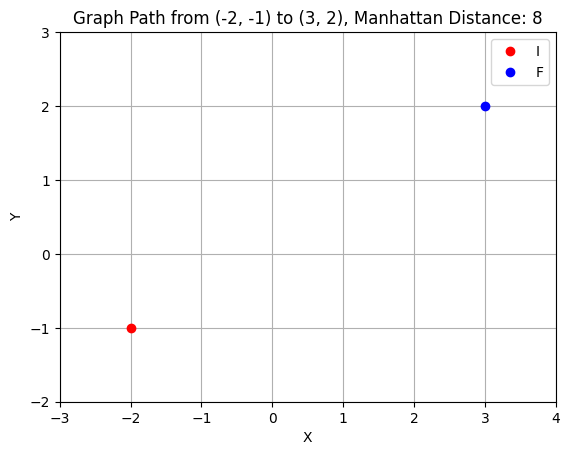

In [29]:
import matplotlib.pyplot as plt
def plot_points(p0,p1):
  """Generate an plot acord to the point
  Args:
    p0: Tuple (x0,y0) starting point
    p1: Tuple (x1,y1) ending point
  Return:
    None
  """
  # Data
  x0,y0=p0
  x1,y1=p1
  manhattan_distance=abs(x1-x0)+abs(y1-y0)
  # Set limits
  padding=1
  x_min=min(x0,x1)-padding
  x_max=max(x0,x1)+padding
  y_min=min(y0,y1)-padding
  y_max=max(y0,y1)+padding

  # Create figure and axes
  fig,ax= plt.subplots()

  # Plot poins
  ax.plot(x0,y0,'ro', label='P0')
  ax.plot(x1,y1,'bo', label='P1')

  # Preparing plot
  ax.grid(True)
  ax.set_xlim(x_min,x_max)
  ax.set_ylim(y_min,y_max)
  ax.legend('IF')
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_title(f'Graph Path from {p0} to {p1}, Manhattan Distance: {manhattan_distance}')
  plt.show()
plot_points((-2,-1),(3,2))